**Author:** Maciej Tarsa <br>
**Date:** 04 January 2021

# Sea Level Predictor

This is the implementation of the project from Data Analysis with Python course at freeCodeCamp.org

Link to the solution to repl.it:<br>
https://repl.it/@MaciejTarsa/boilerplate-sea-level-predictor#sea_level_predictor.py

This project currently returns an error because of float values differeing beyond 8 decimal places. This is either due to Python version change or the dependencies of this project.<br>
As discussed here:<br>
https://forum.freecodecamp.org/t/sea-level-predictor-errors/437517/3

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from `epa-sea-level.csv`.
- Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
- Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

### Solution

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [146]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    fig, axs = plt.subplots(1, 1)

    fig.set_figwidth(15)
    fig.set_figheight(5)
    a = plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    # First, get the slope and intercept values of the line
    slope, intercept, r_value, p_value, stderr = linregress(df['Year'], df['CSIRO Adjusted Sea Level'].values)
    
    # Now, plot the line
    # Create a list of x values between 1880 and 2050
    x = pd.Series(range(1880, 2050))
    # plot the line
    b = plt.plot(x, slope*x + intercept, 'g-')


    # Create second line of best fit
    # Set up a new df that only cotains data for 2000 and above
    df_2000 = df[df['Year'] >= 2000]
    
    # get the slope and intercept value
    slope2, intercept2, r_value2, p_value2, stderr2 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'].values)
    
    # Create a list of x values between 1880 and 2050
    x2 = pd.Series(range(2000, 2050))
    # plot the line
    c = plt.plot(x2, slope2*x2 + intercept2, 'r-')

    # Add labels and title
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
    plt.grid()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

### Test the solution

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

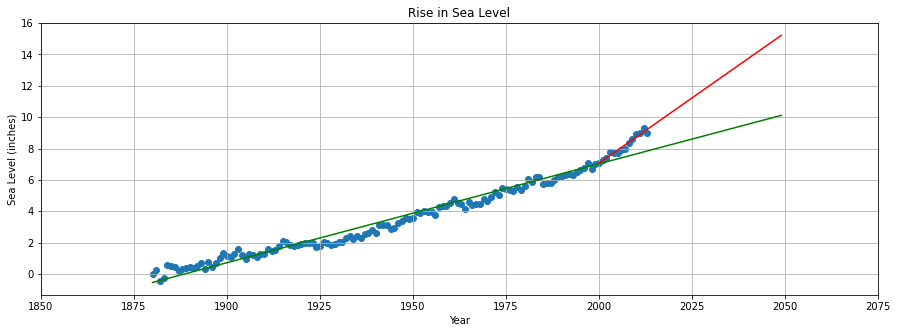

In [147]:
draw_plot()

## Code elaboration

In this section, I include the code I used to arrive at the solutions to each section

In [124]:
# read data from the file
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


#### Create a scatter plot

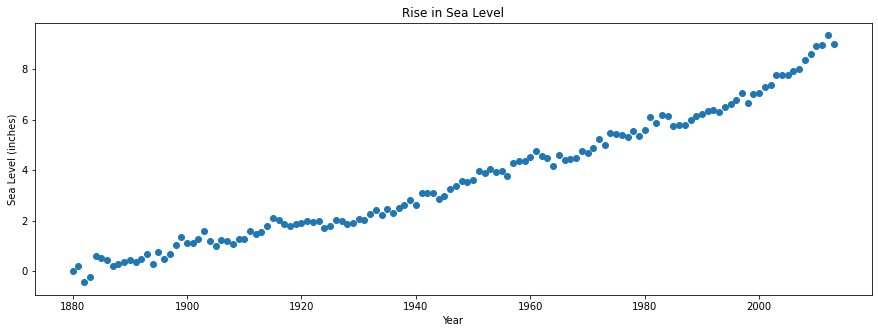

In [125]:
fig, axs = plt.subplots(1, 1)

fig.set_figwidth(15)
fig.set_figheight(5)
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

plt.show()

#### First line of best fit

Use linregress function from scipi, stats

In [29]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level'].values

In [126]:
slope, intercept, r_value, p_value, stderr = linregress(df['Year'], df['CSIRO Adjusted Sea Level'].values)

In [127]:
print(intercept)

-119.06594196773978


Extend the graph so that the line contains year 2050 projection.
Use of np.linspace()
https://stackoverflow.com/questions/60362481/is-there-a-pythonic-way-to-extend-a-line-in-a-graph-from-two-datapoints

In [128]:
# E.g. this code will generate 10 numbers in range 1880 to 2050
np.linspace(1880,2050, 10)

array([1880.        , 1898.88888889, 1917.77777778, 1936.66666667,
       1955.55555556, 1974.44444444, 1993.33333333, 2012.22222222,
       2031.11111111, 2050.        ])

In [129]:
# alternative solution without using NumPy is to use pd.Series(range())
pd.Series(range(1880,2051))

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64

#### Second line of best fit

For this I need to use the subset of data covering years 2000 and above

In [130]:
df_2000 = df[df['Year'] >= 2000]
df_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354
